In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163706 sha256=44070e1312382f2db14c9fc3a1c44472f427ee802aa6ac6f1efda151002af55c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [17]:
import numpy as np
import pandas as pd
from surprise import Dataset,Reader
from surprise import SVD
from surprise.model_selection import train_test_split,cross_validate
from surprise import accuracy
import time
import matplotlib.pyplot as plt

In [18]:
csv_file_path_1 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_5000_0.8.csv'
csv_file_path_2 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_10000_0.8.csv'
csv_file_path_3 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_15000_0.8.csv'
csv_file_path_4 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_20000_0.8.csv'
csv_file_path_5 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_50000_0.8.csv'
csv_file_path_6 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_100000_0.8.csv'



In [19]:
def modify_df(df_user):
  df_user_mod = df_user.reset_index().melt(id_vars='Users', var_name='location', value_name='raw_rating')
  df_user_mod.columns = ['user', 'location', 'ratings']
  return df_user_mod

In [20]:
def compute_performance_metrics(df_user_mod):

  reader = Reader(rating_scale=(1, 5))
  data = Dataset.load_from_df(df_user_mod[['user', 'location', 'ratings']], reader)
  trainset, testset = train_test_split(data, test_size=.2)
  svd = SVD(n_factors=200,n_epochs=50,lr_all = 0.0001)
  start_time = time.time()

  svd.fit(trainset)
  end_time = time.time()
  elapsed_time = end_time - start_time
  predictions = svd.test(testset)
  rmse = accuracy.rmse(predictions)
  mae = accuracy.mae(predictions)

  return rmse,mae,elapsed_time

In [21]:
df_user_5k = pd.read_csv(csv_file_path_1,index_col=0)
df_user_10k = pd.read_csv(csv_file_path_2,index_col=0)
df_user_15k = pd.read_csv(csv_file_path_3,index_col=0)
df_user_20k = pd.read_csv(csv_file_path_4,index_col=0)
df_user_50k = pd.read_csv(csv_file_path_5,index_col=0)
df_user_100k = pd.read_csv(csv_file_path_6,index_col=0)

In [22]:
df_user_mod_5k = modify_df(df_user_5k)
df_user_mod_10k = modify_df(df_user_10k)
df_user_mod_15k = modify_df(df_user_15k)
df_user_mod_20k = modify_df(df_user_20k)
df_user_mod_50k = modify_df(df_user_50k)
df_user_mod_100k = modify_df(df_user_100k)
df_user_mod_100k.head(10)

,user,location,ratings
0,user_0,Manali,5.0
1,user_1,Manali,3.0
2,user_2,Manali,5.0
3,user_3,Manali,1.0
4,user_4,Manali,1.0
5,user_5,Manali,1.0
6,user_6,Manali,1.0
7,user_7,Manali,3.0
8,user_8,Manali,2.0
9,user_9,Manali,2.0


In [23]:
rmse_5k,mae_5k ,time_5k= compute_performance_metrics(df_user_mod_5k)
rmse_10k,mae_10k,time_10k =compute_performance_metrics(df_user_mod_10k)
rmse_15k,mae_15k,time_15k =compute_performance_metrics(df_user_mod_15k)
rmse_20k,mae_20k,time_20k =compute_performance_metrics(df_user_mod_20k)
rmse_50k,mae_50k,time_50k =compute_performance_metrics(df_user_mod_50k)
rmse_100k,mae_100k,time_100k =compute_performance_metrics(df_user_mod_100k)

RMSE: 1.7531
MAE:  1.5416
RMSE: 1.7456
MAE:  1.5340
RMSE: 1.7463
MAE:  1.5353
RMSE: 1.7476
MAE:  1.5370
RMSE: 1.7459
MAE:  1.5366
RMSE: 1.7454
MAE:  1.5361


In [28]:
perf_pd = pd.DataFrame(columns = ['No of Users(in thousand)','RMSE','MAE','Time Taken'])
perf_pd

,No of Users(in thousand),RMSE,MAE,Time Taken


In [25]:
dict_1 ={'No of Users(in thousand)':5,'RMSE':rmse_5k,'MAE':mae_5k,'Time Taken':time_5k}
dict_2 ={'No of Users(in thousand)':10,'RMSE':rmse_10k,'MAE':mae_10k,'Time Taken':time_10k}
dict_3 ={'No of Users(in thousand)':15,'RMSE':rmse_15k,'MAE':mae_15k,'Time Taken':time_15k}
dict_4 ={'No of Users(in thousand)':20,'RMSE':rmse_20k,'MAE':mae_20k,'Time Taken':time_20k}
dict_5 ={'No of Users(in thousand)':50,'RMSE':rmse_50k,'MAE':mae_50k,'Time Taken':time_50k}
dict_6 ={'No of Users(in thousand)':100,'RMSE':rmse_100k,'MAE':mae_100k,'Time Taken':time_100k}

In [29]:
perf_pd = perf_pd.append(dict_1,ignore_index=True)
perf_pd = perf_pd.append(dict_2,ignore_index=True)
perf_pd = perf_pd.append(dict_3,ignore_index=True)
perf_pd = perf_pd.append(dict_4,ignore_index=True)
perf_pd = perf_pd.append(dict_5,ignore_index=True)
perf_pd = perf_pd.append(dict_6,ignore_index=True)
perf_pd

<ipython-input-29-ede668b6d788>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append(dict_1,ignore_index=True)
<ipython-input-29-ede668b6d788>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append(dict_2,ignore_index=True)
<ipython-input-29-ede668b6d788>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append(dict_3,ignore_index=True)
<ipython-input-29-ede668b6d788>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append(dict_4,ignore_index=True)
<ipython-input-29-ede668b6d788>:5: FutureWarning: The frame.append method is deprecated and will be removed from pan

,No of Users(in thousand),RMSE,MAE,Time Taken
0,5.0,1.753108,1.541626,31.848758
1,10.0,1.745633,1.534011,70.713898
2,15.0,1.746292,1.535300,108.186459
3,20.0,1.747603,1.537025,144.736475
4,50.0,1.745872,1.536578,349.062072
5,100.0,1.745449,1.536092,714.823296


from matplotlib import pyplot as plt
perf_pd['No of Users(in thousand)'].plot(kind='hist', bins=20, title='No of Users(in thousand)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['Time Taken'].plot(kind='hist', bins=20, title='Time Taken')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd.plot(kind='scatter', x='No of Users(in thousand)', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd.plot(kind='scatter', x='MAE', y='Time Taken', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['No of Users(in thousand)']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('No of Users(in thousand)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('No of Users(in thousand)')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['No of Users(in thousand)']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('No of Users(in thousand)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('No of Users(in thousand)')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['No of Users(in thousand)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'No of Users(in thousand)'}, axis=1)
              .sort_values('No of Users(in thousand)', ascending=True))
  xs = counted['No of Users(in thousand)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('No of Users(in thousand)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('No of Users(in thousand)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
perf_pd['No of Users(in thousand)'].plot(kind='line', figsize=(8, 4), title='No of Users(in thousand)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['Time Taken'].plot(kind='line', figsize=(8, 4), title='Time Taken')
plt.gca().spines[['top', 'right']].set_visible(False)

array([  5.,  10.,  15.,  20.,  50., 100.])

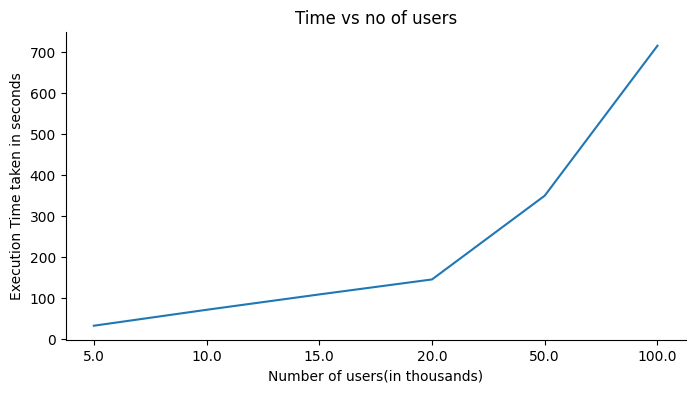

In [43]:
from matplotlib import pyplot as plt
perf_pd['Time Taken'].plot(kind='line', figsize=(8, 4), title='Time vs no of users')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of users(in thousands)')
plt.ylabel('Execution Time taken in seconds')
plt.xticks([0,1,2,3,4,5],labels=perf_pd['No of Users(in thousand)'].values)
perf_pd['No of Users(in thousand)'].values